##ACTIVIDAD SEMANAL 7 -- REGRESIONES Y K MEANS
##NOTEBOOK 1 - REGRESIÓN SIMPLE

###Denisse María Ramírez Colmenero 

###A01561497



Materia: Ciencia y Analítica de Datos 

Profesora titular: Doc. María de la Paz Rico Fernández

Profesor tutor: Orlando Figón Cruz 

Fecha de entrega: 09 de Noviembre de 2022 

-------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

##Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

In [3]:
url = '/content/EconomiesOfScale.csv'
data = pd.read_csv(url)
print(data.shape)
data.head() #1000 muestras

(1000, 2)


,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
X = data[['Number of Units']] #Variable de entrada
y = data['Manufacturing Cost']#variable de salida 

In [5]:
len(X)

1000

In [6]:
y.head()

0    95.066056
1    96.531750
2    73.661311
3    95.566843
4    98.777013
Name: Manufacturing Cost, dtype: float64

###1. Divide los datos del costo de manufactura. Utiliza la función train_test_split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [8]:
X_train.shape

(850, 1)

###2. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [9]:
#creamos el objeto de Regresión lineal
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train,y_train) #entrenamos el modelo 

y_pred_test = regresion_lineal.predict(X_test)
print("De nuestra ecuación y = mx + b")
print("La pendiente 'm' es el coeficiente:", regresion_lineal.coef_)
print("El término independiente 'b' es:", regresion_lineal.intercept_)

m = regresion_lineal.coef_
b = regresion_lineal.intercept_
print("La ecuación del modelo generado es: y =", m,"x +", b) 

De nuestra ecuación y = mx + b
La pendiente 'm' es el coeficiente: [-5.91602323]
El término independiente 'b' es: 66.44764675174278
La ecuación del modelo generado es: y = [-5.91602323] x + 66.44764675174278


In [10]:
print("RESULTADOS PARA EL CONJUNTO DE PRUEBA")
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_test))
print('Varianza: %.2f' % r2_score(y_test, y_pred_test))

RESULTADOS PARA EL CONJUNTO DE PRUEBA
Error medio Absoluto (MAE) del modelo: 5.011595088997378
Raíz del Error Cuadrático Medio (RMSE): 7.2416891490838875
R-cuadrada del modelo: 0.6171440942171167
Varianza: 0.62


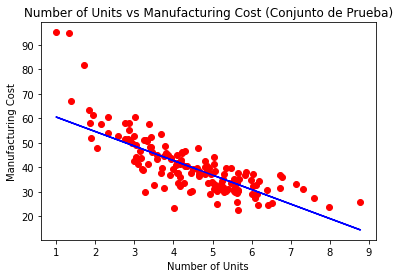

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred_test, color = 'blue')
plt.title('Number of Units vs Manufacturing Cost (Conjunto de Prueba)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

###3. Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

X_test_poli = poly_features.fit_transform(X_test)

#realizamos las predicciones
y_pred_pt = lin_reg.predict(X_test_poli)


print("De nuestra ecuación y = a1x1 + a2x1^2 + b")
print("La pendiente a1 + a2' es el coeficiente:", lin_reg.coef_)
print("El término independiente 'b' es:", lin_reg.intercept_)

a1 = lin_reg.coef_[0]
a2 = lin_reg.coef_[1]
b = lin_reg.intercept_
print("La ecuación del modelo generado es: y =", a1,"x1 +", a2,"x1^2 +", b) 

De nuestra ecuación y = a1x1 + a2x1^2 + b
La pendiente a1 + a2' es el coeficiente: [-16.27563255   1.12121998]
El término independiente 'b' es: 88.38865903399889
La ecuación del modelo generado es: y = -16.275632553852986 x1 + 1.1212199764148691 x1^2 + 88.38865903399889


In [14]:
orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_predictpoli=y_pred_pt[orden]

In [13]:
print("RESULTADOS PARA EL CONJUNTO DE PRUEBA")
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(y_test, y_pred_pt))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pt)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_pt))

RESULTADOS PARA EL CONJUNTO DE PRUEBA
Error medio Absoluto (MAE) del modelo: 4.459445302443204
Raíz del Error Cuadrático Medio (RMSE): 6.081945518433532
R-cuadrada del modelo: 0.7299521995869951


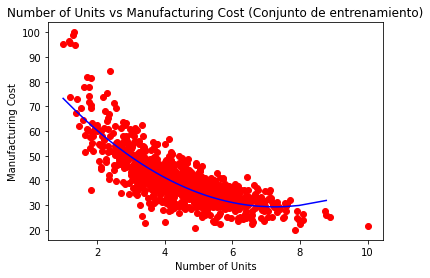

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(sortedXp, sorted_predictpoli, color = 'blue')
plt.title('Number of Units vs Manufacturing Cost (Conjunto de entrenamiento)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

###4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

LASSO

In [35]:
model_lasso = Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('lasso', Lasso(alpha=0.01, random_state=42))])

In [36]:
model_lasso.fit(X_train, y_train)
#X_new_lasso=np.linspace(0, 9, 150).reshape(150, 1)

y_pred_L = model_lasso.predict(X_test)

In [37]:
orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_lasso=y_pred_pt[orden]

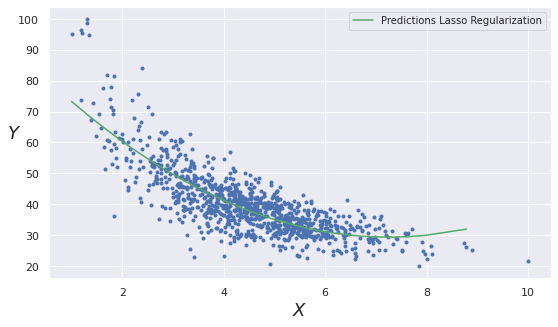

In [38]:
plt.figure(figsize=(9, 5))
plt.plot(X,y,'b.')
plt.plot(sortedXp,sorted_lasso, 'g-', label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=10);

In [39]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
print('Coeficiente del modelo Ridge es:',lasso.coef_)
print('Intercepción del modelo Ridge es:',lasso.intercept_)

Coeficiente del modelo Ridge es: [-5.91032056]
Intercepción del modelo Ridge es: 66.42210914474295


In [41]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(y_test, y_pred_L))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_L)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_L))

Error medio Absoluto (MAE) del modelo: 4.4549982549923985
Raíz del Error Cuadrático Medio (RMSE): 6.098705532928617
R-cuadrada del modelo: 0.7284618076752039


RIDGE

In [25]:
model_ridge = Pipeline([('polinomial', PolynomialFeatures(degree=15, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('ridge', Ridge(alpha=10, random_state=42))])

In [26]:
model_ridge.fit(X_train, y_train)
#X_new_ridge=np.linspace(0, 9, 150).reshape(150, 1)
y_pred_R = model_ridge.predict(X_test)

In [27]:
orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_ridge=y_pred_R[orden]

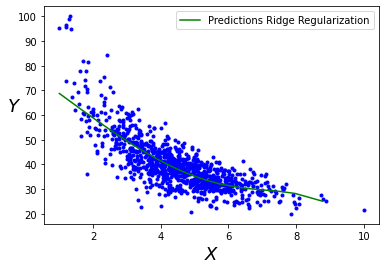

In [28]:
plt.plot(X,y,'b.')
plt.plot(sortedXp,sorted_ridge,'g-', label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=10);

In [29]:
ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X_train, y_train)
print('Coeficiente del modelo Ridge es:',ridge.coef_)
print('Intercepción del modelo Ridge es:',ridge.intercept_)

Coeficiente del modelo Ridge es: [-5.87659697]
Intercepción del modelo Ridge es: 66.27108884118783


In [30]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(y_test, y_pred_R))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_R))
print('Varianza: %.2f' % r2_score(y_test, y_pred_R))

Error medio Absoluto (MAE) del modelo: 4.453275329692578
Raíz del Error Cuadrático Medio (RMSE): 6.287264474037187
R-cuadrada del modelo: 0.7114114792830275
Varianza: 0.71


###5. Finalmente grafica :
MAE (de los cuatro métodos)


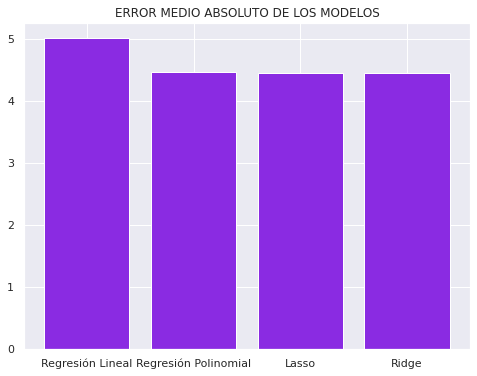

In [42]:
MAE_RL = metrics.mean_absolute_error(y_test, y_pred_test)
MAE_RP = metrics.mean_absolute_error(y_test, y_pred_pt)
MAE_LASSO =  metrics.mean_absolute_error(y_test, y_pred_L)
MAE_RIDGE =  metrics.mean_absolute_error(y_test, y_pred_R)
modelos = [MAE_RL,MAE_RP , MAE_LASSO,MAE_RIDGE]
nombres = ['Regresión Lineal', 'Regresión Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("ERROR MEDIO ABSOLUTO DE LOS MODELOS")
plt.bar(nombres, modelos, color='blueviolet')
plt.show()

In [43]:
print('MAE Regresión Lineal:',MAE_RL,'\nMAE Regresión Polinomial:',MAE_RP, '\nMAE Lasso:',MAE_LASSO, '\nMAE Ridge:',MAE_RIDGE)

MAE Regresión Lineal: 5.011595088997378 
MAE Regresión Polinomial: 4.459445302443204 
MAE Lasso: 4.4549982549923985 
MAE Ridge: 4.453275329692578



R2 (de los cuatro métodos)

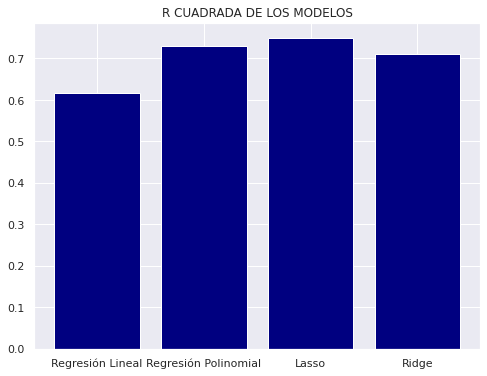

In [33]:
R2_RL = r2_score(y_test, y_pred_test)
R2_RP = r2_score(y_test, y_pred_pt)
R2_LASSO = r2_score(y_test, y_pred_L)
R2_RIDGE = r2_score(y_test, y_pred_R)

modelosr = [R2_RL,R2_RP ,R2_LASSO,R2_RIDGE]
nombres = ['Regresión Lineal', 'Regresión Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("R CUADRADA DE LOS MODELOS")
plt.bar(nombres, modelosr, color='navy')
plt.show()

In [34]:
print('R2 Regresión Lineal:',R2_RL,'\nR2 Regresión Polinomial:',R2_RP, '\nR2 Lasso:',R2_LASSO, '\nR2 Ridge:',R2_RIDGE)

R2 Regresión Lineal: 0.6171440942171167 
R2 Regresión Polinomial: 0.7299521995869951 
R2 Lasso: 0.7489439990129734 
R2 Ridge: 0.7114114792830275


Explica tus resultados

1. ¿Qué método conviene más a la empresa, ¿por que?

Observando los resultados podemos concluir que al utilizar regularización y/o un modelo polinómico para este conjunto de datos, los resultados de las métricas mejoran, el error absoluto medio disminuye y el coeficiente de determinación aumenta. 
En mi opinión el modelo que mejor predice este este caso es el modelo lasso, ya que incluso usando un grado 2 sus resultados son casi iguales que al de los demás y a medida que se aumenta ese grado sus métricas de desempeño mejoran. Sin embargo podríamos decir que los cuatro modelos tienen resultados bastante similares. 

Para el caso de Lasso y Ridge los valores de alpha que tienen fueron los que mejor comportamiento dan, por lo que no se pueden mejorarse mucho. Para Lasso, mientras mayor era alpha, el modelo se castiga más por lo que se hace cada vez mas plana la curva, sin embargo fue el valor de 0.01 el que menor error tenía. Por otro lado para Ridge se utilizó un valor de 10 ya que aunque la curva en la gráfica se ve muy similar, este valor da un menor error. 

2. ¿Qué porcentajes de entrenamiento y evaluación usaste?

Para este conjunto de datos se utilizó una partición de 85% para entrenamiento y 15% para prueba, ya que al ser solo 1000 muestras, el modelo necesita una buena proporción de los datos para poder hacer bien su entrenamiento. 

3. ¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?

Para los cuatro modelos tenemos un valor de MAE entre 4 y 5. Esta métrica simplemente nos habla  de la distancia vertical entre el valor real y el predecido y al ser variables sesgados (como los costos en este ejemplo), los errores tambien tendrán resultados sesgados, es decir, que a pesar de que la mayoría de errores sean muy pequeños, si uno que otro es muy grande, el promedio cambia drasticamente, por lo que a veces no es muy conveniente guiarnos por estos resultados. 

Respecto a los resultados de R2, considero que son un poco mas claros ya que sabemos que mientras mas cercano a 1, mejor es. Considero que un resultado de 0.75 aprox en el caso de Lasso es bueno pero sin duda se podría mejorar. Esto puede ser debido a que solo hay un feature, quizá al aumentar la complejidad del conjunto de datos mismo, las predicciones podrían ser mas altas. 

REFERENCIAS: 

1. Fisher, A. (2022, 30 marzo). Predicting King County House Prices with Multiple Linear Regression. Medium. https://medium.com/analytics-vidhya/predicting-king-county-house-prices-with-multiple-linear-regression-84de5feeafb2

2. Gonzalez, L. (2022, 1 septiembre). Evaluando el error en los modelos de regresión [Vídeo]. 🤖 Aprende IA. https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/
